In [2]:
!mamba install geopandas

import geopandas as gpd
import matplotlib.pyplot as plt

print(f"GeoPandas версия: {gpd.__version__}")
print("Успешно установлено!")

mambajs 0.19.13

Specs: xeus-python, numpy, matplotlib, pillow, ipywidgets>=8.1.6, ipyleaflet, scipy, geopandas
Channels: emscripten-forge, conda-forge

Solving environment...
Solving took 1.5304000000357627 seconds
  Name                          Version                       Build                         Channel                       
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
+ brotli-python                 1.2.0                         py313h33caa6c_0               emscripten-forge              
+ certifi                       2026.1.4                      pyhd8ed1ab_0                  conda-forge                   
+ charset-normalizer            3.4.4                         pyhd8ed1ab_0                  conda-forge                   
+ folium                        0.20.0                        pyhd8ed1ab_0                  conda-forge                   
+ geopandas                     1.1.2           

In [3]:
#world = gpd.read_file("https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_countries.zip")
#cities = gpd.read_file("https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_populated_places.zip")
from shapely.geometry import Point
data = {
    'city': ['London', 'Paris', 'Berlin', 'Madrid', 'Rome'],
    'country': ['UK', 'France', 'Germany', 'Spain', 'Italy'],
    'geometry': [Point(-0.1276, 51.5074), Point(2.3522, 48.8566), 
                 Point(13.4050, 52.5200), Point(-3.7038, 40.4168), 
                 Point(12.4964, 41.9028)]
}
cities = gpd.GeoDataFrame(data, crs="EPSG:4326")

# Для карты мира создадим bounding box
from shapely.geometry import box
world = gpd.GeoDataFrame({'continent': ['Europe']}, 
                         geometry=[box(-10, 35, 30, 60)], 
                         crs="EPSG:4326")

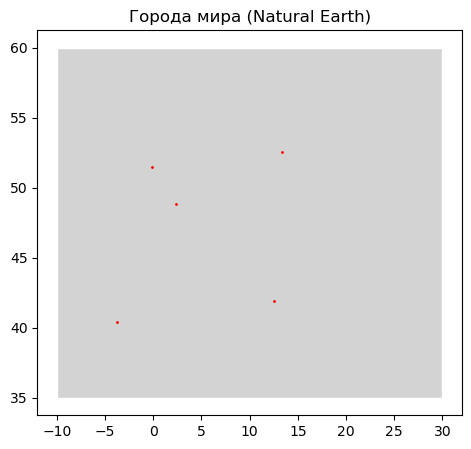

In [4]:
# Карта 1: города мира
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
world.plot(ax=ax, color='lightgray', edgecolor='white')
cities.plot(ax=ax, color='red', markersize=1)
ax.set_title('Города мира (Natural Earth)')
plt.show()


Text(0, 0.5, 'Количество')

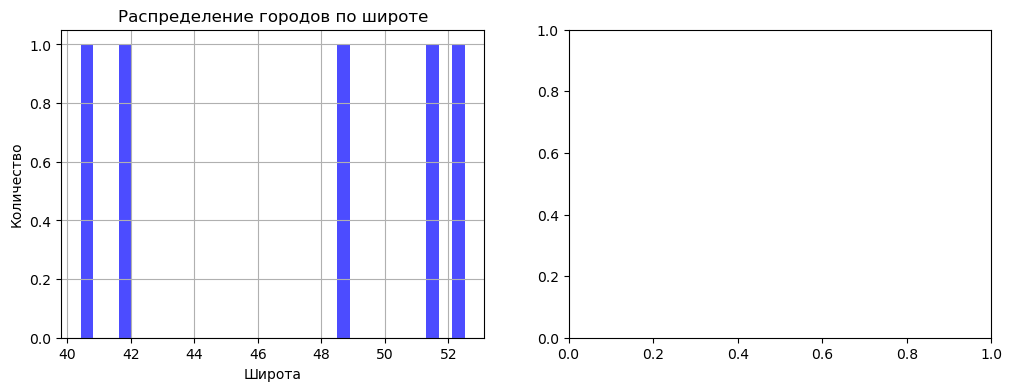

In [4]:
# Карта 2: плотность городов (гистограмма по широте)
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
cities.geometry.y.hist(ax=ax[0], bins=30, color='blue', alpha=0.7)
ax[0].set_title('Распределение городов по широте')
ax[0].set_xlabel('Широта')
ax[0].set_ylabel('Количество')

In [5]:
# Карта 3: города в Европе (упрощённо)
europe = world[world['continent'] == 'Europe']
europe_cities = cities[ cities.geometry.within(europe.union_all()) ]
europe.plot(ax=ax[1], color='lightgreen')
europe_cities.plot(ax=ax[1], color='black', markersize=2)
ax[1].set_title('Города Европы')
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>